In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

# Initial blending probe curves plotter

(175,)
(175,)


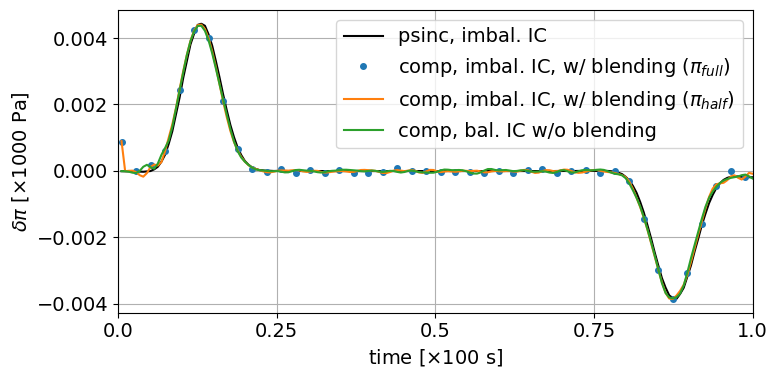

In [325]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
if swe:
    p_ref = 10.0
else:
    p_ref = 10.0
times = np.arange(0,176)#[:50]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    probe = probe[1:]
    
    probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    sfx1 = 'psinc_noib'
    sfx2c = 'comp_imbal_half_ib-0'
    sfx2b = 'comp_imbal_full_ib-16'
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'comp_imbal_noib'

    l1, p1 = get_ens(sfx1, diff, attribute)
#     l2a, p2a = get_ens(sfx2a, diff, attribute)
    l2b, p2b = get_ens(sfx2b, diff, attribute)
    l2c, p2c = get_ens(sfx2c, diff, attribute)
    attribute = 'p2_nodes'
    l3, p3 = get_ens(sfx3, diff, attribute)

    fs = (8,4) # fs used in write-up for first pub
#     fs = (16,6)
    pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]

    ins = p1
    beta = 5.0/8
    rolled = np.roll(ins,-1)
    rolled = (beta * ins + (1.0-beta) * rolled)
    rsfx = 'rolled by %.3f' %beta
    
    ref = 'lake' if swe else 'psinc'
    full = 'SWE' if swe else 'comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    l1 = '%s, imbal. IC' %(ref)
#     l2c = '%s, imbal. IC w/ blending' %full
    l2c = r'%s, imbal. IC, w/ blending ($\pi_{half}$)' %full
    l2b = r'%s, imbal. IC, w/ blending ($\pi_{full}$)' %full
#     l = r'Comp imbal. IC, $\beta_{half}=4/8$'
    l3 = '%s, %s IC w/o blending' %(full, ic)
    ic = ic[:-1]
    
    print(times.shape)
    print(p1.shape)
    ax.plot(times, p1, 'k', label=l1)
#     ax.plot(times, p2a, '-', ms=7, markevery=4, label=l2a)
    ax.plot(times, p2b, 'C0o', ms=4, markevery=4, label=l2b)
    ax.plot(times, p2c, 'C1o', ms=4, markevery=4, label=l2c)
    ax.plot(times, p3, 'C2', label=l3)
#     ax.plot(times, rolled, '--',label=rsfx)

    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
#         tcl = 'Euler vortex'
        qty = '$\delta \pi$'

#     ax.set_title("%s: probe measurement of %s at [%i,%i]" %(tcl, qty, probe_loc[0]-32,probe_loc[1]-32))
    ax.set_xlim([times[0],times[-1]])
    if swe:
        ax.set_xlabel(r'time [$\times 1000$ s]')
        ax.set_ylabel(r'$\delta h$ [m]')
    else:
        ax.set_xlabel(r'time [$\times 100$ s]')
        ax.set_ylabel(r'$\delta \pi$ [$\times 1000$ Pa]')
        
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
#     ax.set_xlim([176*0.10,176*0.40])
#     ax.set_ylim([-0.0001,0.0005])
    pl.img.tight_layout()
    
    fn = 'swe' if swe else 'euler'
    pl.save_fig('%s_w_%s' %(fn, ic))
#     pl.save_fig('euler_half_comparisons')
    
    prt.prtt('plt')

# Initial vortex plotter

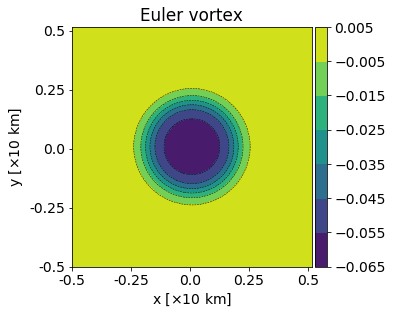

In [23]:
attribute = 'p2_nodes'
et = 1.0

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# times = np.arange(0,176)#[:50]
times = [0]
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='ic')[0]
    if swe: ens = ens[:,0,:]
    ens *= 10.0

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_bal_noib'
l1, a1 = get_ens(swe_tc, sfx1, diff, attribute,swe=True)
sfx1 = 'comp_bal_ip'
l2, a2 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)

swe = False
if swe:
    la = 'SWE_vortex'
    aa = a1
    lvls = np.arange(-0.0155,0.0035,0.0030) * 10.0
else:
    la = 'Euler vortex'
    aa = a2
    lvls = np.arange(-0.0065,0.0015,0.0010) * 10.0
    
ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(10,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'


pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour', lvls=lvls)

lbl = 'swe' if swe else 'euler'
pl.save_fig('initial_vortex_%s' %lbl)

# Obs truth plotter

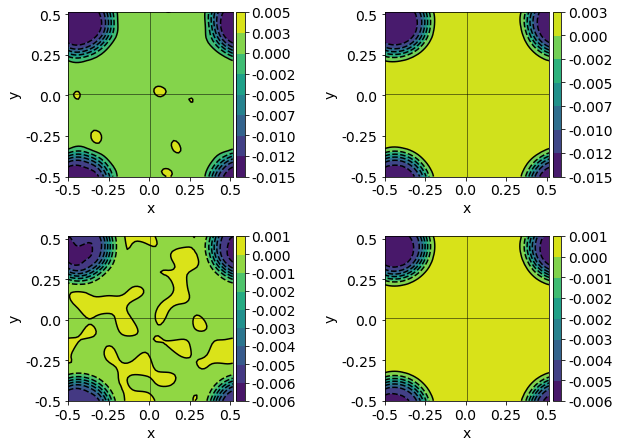

In [180]:
attribute = 'p2_nodes'
et = 3.0

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# times = np.arange(0,176)#[:50]
times = np.arange(0.0,3.0,0.01)[1:]
times = [0.5]
# l_typ = 'WINDOW_STEP'
l_typ = 'TIME'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True, tag=None):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)[-1]
    if swe: ens = ens[:,0,:].T
    if not swe: ens = ens.T

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_1.0_pp_tra_truth'
l1, a1 = get_ens(swe_tc, sfx1, diff, attribute)
# times = [0.01]
sfx1 = 'comp_1.0_pp_tra_truth_ib'
l2, a2 = get_ens(swe_tc, sfx1, diff, attribute)

sfx1 = 'comp_1.0_pp_tra_truth'
l3, a3 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)
# times = [0.01]
sfx1 = 'comp_1.0_pp_tra_truth_ib'
l4, a4 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)

pl_lst = [[a1, ''],
          [a2, ''],
          [a3, ''],
          [a4, '']]

pl = pt.plotter(pl_lst,ncols=2,figsize=(9,7),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x'
y_label = r'y'
axhline = 32
axvline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('obs_truth')

# Load truths...

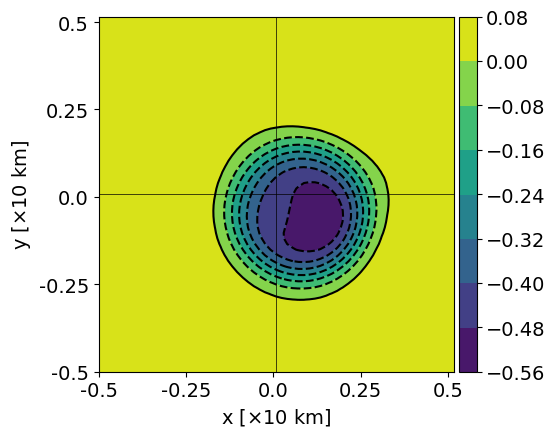

In [340]:
attribute = 'p2_nodes'
et = 3.0

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

times = [3.0]
l_typ = 'TIME'
tags = euler_tc.get_tag_dict()
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)[-1]
    if swe:
        ens = ens[:,0,:]
    else:
        ens *= 100.0
    ens = ens.T
#     

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_1.0_pp_tra_truth_ib'
attribute0 = 'rhou'
l1, a1 = get_ens(swe_tc, sfx1, diff, attribute,swe=True)
sfx1 = 'comp_1.0_pp_tra_truth_ip_ib-0'
attribute1 = 'p2_nodes'
l2, a2 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)

attr = attribute0 if swe else attribute1

swe = False
if swe:
    la = 'SWE_vortex'
    aa = a1
    lvls = np.arange(-0.0155,0.0065,0.0015) * 10.0
else:
    la = 'Euler vortex'
    aa = a2
    lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
ll = [aa, '']
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(10,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 32
axhline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')

lbl = 'swe' if swe else 'euler'
pl.save_fig('truth_%s_%s' %(lbl,attr))

# Load observations...

0.02038735983690112
410.0
(64, 64)


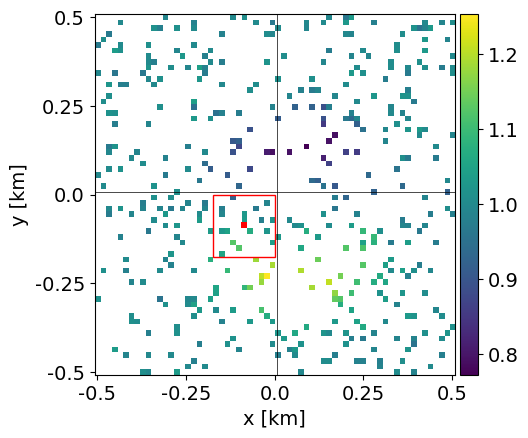

In [838]:
swe=True

if swe:
    Nx, Ny, Nz = 64, 1, 64
else:
    Nx, Ny = 64, 64
    
et = 3.0

def load(Nx,Ny,et):
    if swe:
        base_fn = 'output_swe_vortex'
        pydir = '../%s/' %base_fn
        tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    else:
        base_fn = 'output_travelling_vortex'
        pydir = '../%s/' %base_fn
        tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
        
    tags = tc.get_tag_dict()
    return tc, tags

tc, tags = load(Nx,Ny,et)

N = 10
if swe:
    sfx0 = 'wdawloc_rhou_rhow_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhow_debug_letkf_s10p_ib-0'
    p_ref = 1.0
else:
    sfx0 = 'wdawloc_all_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_all_debug_letkf_s10p_ib-0'
    p_ref = 100.0
sfx0 = tc.cb_suffix(1,0, '%s' %(sfx0))

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

i2 = (slice(2,-2),slice(2,-2))

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
obs = pickle.load(file)
obs_noisy = pickle.load(file)
# obs_noisy_interp = pickle.load(file)
obs_mask = pickle.load(file)
obs_covar = pickle.load(file)
file.close()

print(ud.Msq)
attr = 'rhou' if swe else 'p2_nodes'

time_index = 11
attribute = attr
obs_arr = obs[time_index][attribute][i2].T
obs_arr = [obs_arr, 'observation']
obs_n_arr = obs_noisy[time_index][attribute][i2].T
obs_mask_arr = obs_mask[time_index][attribute]
obs_mask_arr = obs_mask_arr[i2].T
# obs_n_arr = [obs_n_arr, 'obs + noise']
# obs_ni_arr = obs_noisy_interp[time_index][attribute][i2].T
obs_noisy_masked = np.ma.array(obs_n_arr,mask=obs_mask_arr).filled(fill_value=np.nan)
print(obs_mask_arr.size - obs_mask_arr.sum())
print(obs_mask_arr.shape)
pl_lst = [[obs_noisy_masked * p_ref,'']]

pl = pt.plotter(pl_lst,ncols=1,figsize=(10,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 32
axhline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='imshow')

lbl = 'swe' if swe else 'euler'
pl.save_fig('obs_%s_%s' %(lbl,attr))

0.0008154943934760448

# Ensembles contour plots generator for EnNoDA, EnDA, and EnDAB

In [2]:
swe = False

if swe:
    Nx, Ny, Nz = 64, 1, 64
    et = 3.0
    # et = 0.5

    def load(Nx,Ny,Nz,et):
        base_fn = 'output_swe_vortex'
        pydir = '../%s/' %base_fn

        tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
        tags = tc.get_tag_dict()

        return tc, tags
    tc, tags = load(Nx,Ny,Nz,et)

else:
    Nx, Ny = 64, 64
    et = 3.0

    def load(Nx,Ny,et):
        base_fn = 'output_travelling_vortex'
        pydir = '../%s/' %base_fn

    #     tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
        tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
        tags = tc.get_tag_dict()
        return tc, tags
    tc, tags = load(Nx,Ny,et)

False
9495.207 4999.964 4495.243
9495.207 4999.964 4495.243
5426.4165
5426.4165
(12, 2)


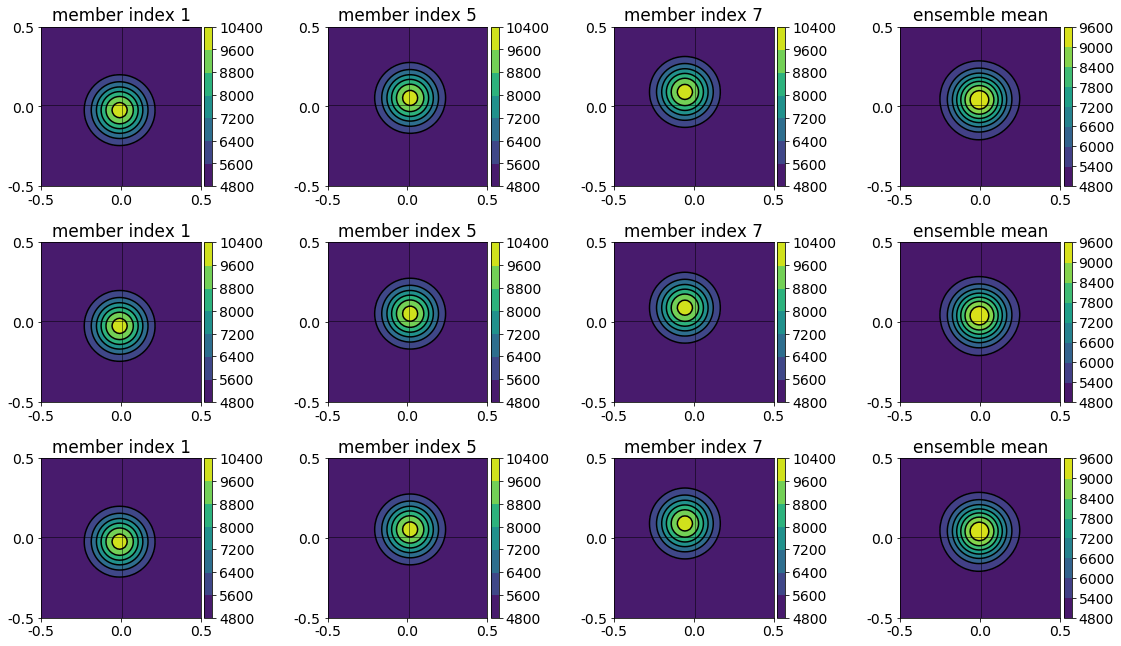

In [5]:
import random

random.seed(444)

N = 10
# sfx0 = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
# sfx0 = 'wdawloc_pp_all_tra_0.25_nonorm'
print(swe)
if swe:
    sfx0 = 'wdawloc_rhou_rhow_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhow_debug_letkf_s10p_ib-0'
else:
    sfx0 = 'wdawloc_all_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_all_debug_letkf_s10p_ib-0'
sfx1 = tc.cb_suffix(1,0, '%s' %(sfx0))
sfx_ref = 'noda_pp'
sfx_ref = 'pp_tra_ip_nonorm_ib-0'
# attribute = 'rhow'
attributes = ['rho','rhou']
# attributes = ['p2_nodes']
attributes = ['rho']
attribute = attributes[0]

times = [0.0]
tag = 'ic'

times = [0.01]
tag = tags[9]

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

if len(attributes) > 1:
    for attribute in attributes:
        ens0 = tc.get_ensemble(times, N, attribute, sfx0, tag=tag, inner=True)[-1]
        ens1 = tc.get_ensemble(times, N, attribute, sfx1, tag=tag, inner=True)[-1]
        ens_ref = tc.get_ensemble(times, N, attribute, sfx_ref, tag=tag, inner=True)[-1]
        setattr(ens0_oo,attribute,ens0)
        setattr(ens1_oo,attribute,ens1)
        setattr(ens_ref_oo,attribute,ens_ref)

    ens0 = getattr(ens0_oo,attributes[1]) / getattr(ens0_oo,attributes[0])
    ens1 = getattr(ens1_oo,attributes[1]) / getattr(ens1_oo,attributes[0])
    ens_ref = getattr(ens_ref_oo,attributes[1]) / getattr(ens_ref_oo,attributes[0])
else:
    ens0 = tc.get_ensemble(times, N, attributes[0], sfx0, tag=tag, inner=True)[-1]
    ens1 = tc.get_ensemble(times, N, attributes[0], sfx1, tag=tag, inner=True)[-1]
    ens_ref = tc.get_ensemble(times, N, attributes[0], sfx_ref, tag=tag, inner=True)[-1]

enses = [ens_ref, ens0, ens1]
sfxes = [sfx_ref, sfx0, sfx1]

diff = False
exp = 1

if swe:
    mean0 = np.mean(ens0,axis=0)[:,0,:] * 10.0
    mean1 = np.mean(ens1,axis=0)[:,0,:] * 10.0
    mean_ref = np.mean(ens_ref,axis=0)[:,0,:] * 10.0
else:
    mean0 = np.mean(ens0,axis=0) * 10000.0
    mean1 = np.mean(ens1,axis=0) * 10000.0
    mean_ref = np.mean(ens_ref,axis=0) * 10000.0
# mean_ref = [mean_ref.T, 'ensemble_mean']
if diff == True:
    mean0 -= mean_ref
    mean1 -= mean_ref
print(mean0.max(), mean0.min(), mean0.max() - mean0.min())
print(mean1.max(), mean1.min(), mean1.max() - mean1.min())
print(np.sqrt((mean0**2).mean()))
print(np.sqrt((mean1**2).mean()))
mean0c = np.copy(mean0)
mean1c = np.copy(mean1)
mean0 = [mean0.T**exp,'ensemble mean']
mean1 = [mean1.T**exp,'ensemble mean']
mean_ref = [mean_ref.T**exp,'ensemble mean']
# mean0 = [mean0.T**exp,'']
# mean1 = [mean1.T**exp,'']
# mean_ref = [mean_ref.T**exp,'']
means = [mean_ref, mean0, mean1]

attr_labels = pt.labels()

arr_lst = []
for bb,ens in enumerate(enses):
    sfx = sfxes[bb]
#     for aa, ens_at in enumerate(ens):
    fs = (14,8)
#     fs = (22,9)
        
    ens_arr = []
    for n,arr in enumerate(ens):
        arr_ref = ens_ref[n]
        if swe:
            arr_ref = arr_ref[:,0,:].T
            arr = arr[:,0,:].T
            arr *= 10.0 ###### d_ref = 10m
        else:
            arr_ref = arr_ref.T
            arr = arr.T
            arr *= 10000.0 ###### p_ref = 10,000m

        if diff == True:
            arr -= arr_ref

        ens_arr.append([arr, 'member index %i' %n])
#     arr_lst = [[arr[:,0,:].T,'member index %i' %n] for n,arr in enumerate(ens_at)]
    k = 0
    if k > N: k = 3
    arr_lst += [ens_arr[1],ens_arr[5],ens_arr[7]]
#     arr_lst = random.sample(arr_lst, k=k)
#     if bb == 2:
    arr_lst.append(means[bb])
    
    nn = 1 if N == 2 else 2
    nn = 1
    ncolslen = int(len(arr_lst)/nn)
        
narr_lst = np.array(arr_lst)
print(narr_lst.shape)

ncolslen = 4
fs = (16,10)
# fs = (5,5)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

x_axs = [-0.5,0.0,0.5]
y_axs = [-0.5,0.0,0.5]
if attribute == 'p2_nodes':
    nnx, nnz = Nx, Nz
else:
    nnx, nnz = Nx-1,Nx-1
    
x_loc = np.linspace(0,nnx,3)
y_loc = np.linspace(0,nnz,3)

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = 32, axvline = 32)

#         st = "Quantity is %s at time %.2f.\n%s" %(attr_labels[attribute], times[0], sfx)
_ = pl.plot(aspect='equal',method='contour')
lbl = 'swe' if swe else 'euler'
# pl.save_fig('%s_enses_means' %lbl)
# pl.save_fig('')

# RMSE probe plots

(300, 64, 64)
(300, 65, 65)


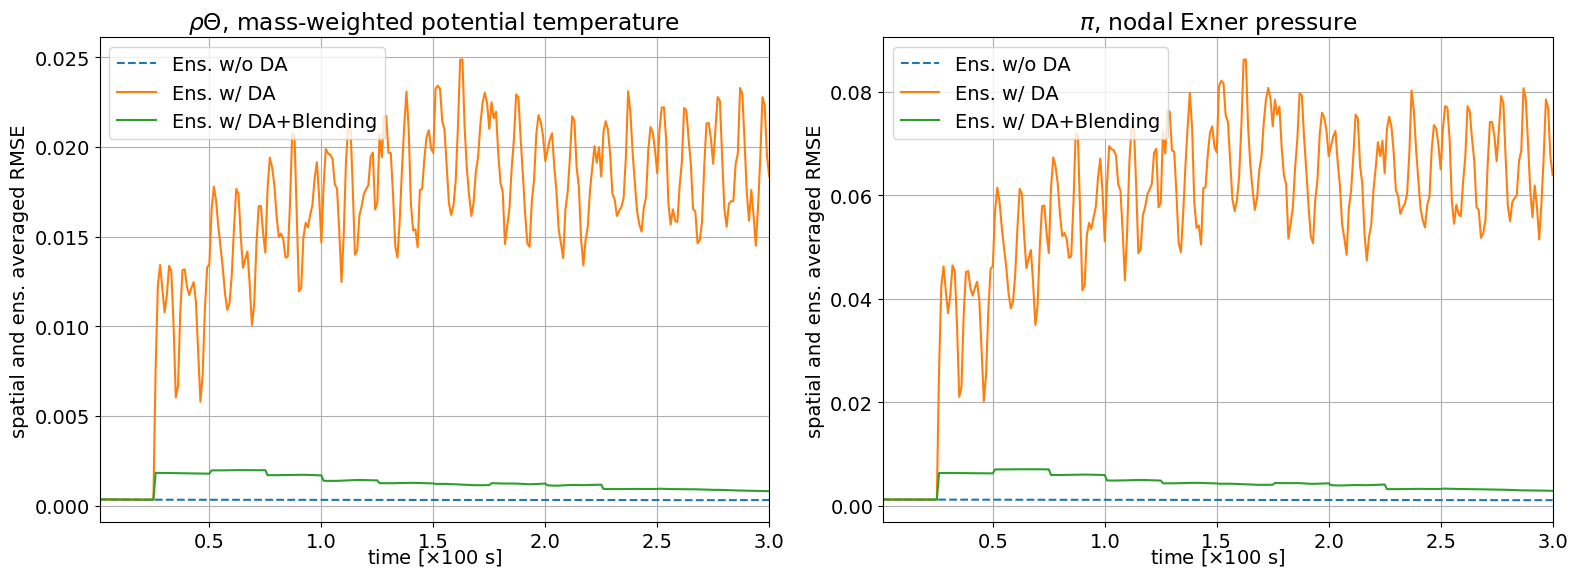

In [78]:
import matplotlib.pyplot as plt

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

et = 3.0
Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

py_directory = "../%s/" %directory

plt.style.use('default')


N = 10
times = np.arange(0.0,3.01,0.01)[1:]

probe_idx = [32,32]

fn = 'effects_obs_covar_ensemble_spread'
title = ''

pl = pt.plotter_1d(figsize=(16,6),fontsize=14,ncols=2,nrows=1)
swe = True if 'swe' in base_fn else False
tc = swe_tc if swe else euler_tc
        
prt = utils.prt_time(debug=False)
if swe:
    attr_labels = pt.swe_labels()
    attributes = ['rho','p2_nodes','rhou','rhow']
    attributes = ['rho','rhou']
else:
    attr_labels = pt.labels()
    attributes = ['rhoY','p2_nodes','rhou','rhov']
    attributes = ['rhoY','p2_nodes']

# attr_shorts = pt.short_labels()

rmse_type = 'probe'
rmse_type = 'spatial'
# rmse_type = 'mean'

ens_34 = False

def get_ens(sfx,diff):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)[1:]
    if swe:
        ens = ens[:,:,0,:]
        if attribute is 'rho': ens *= 10.0
#     print(ens.shape)
    return ens

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    gt = 'n' if attribute == 'p2_nodes' else 'c'
    
    ens_noda_suffix = 'noda_pp'
    ens_noda_suffix = 'pp_tra_ip_nonorm_ib-0'
#     ens_noda_label = 'EnNoDA'
    ens_noda_label = 'Ens. w/o DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    obs_attrs = 'rhou_rhow' if swe else 'rhou_rhov'
#     obs_attrs = 'all'
    tags = 's10p'
    ens_1_suffix = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
    ens_1_suffix = 'wdawloc_pp_rhou_rhow_tra_0.25_nonorm'
    ens_1_suffix = 'wdawloc_rhou_rhow_pp_tra_ip_nonorm_ib-0'
    ens_1_suffix = 'wdawloc_%s_debug_letkf_%s_ib-0' %(obs_attrs,tags)
#     ens_1_suffix = 'wdawloc_pp_all_tra_0.25_nonorm'
    ens_1_label = r'EnDA'
    ens_1_label = r'Ens. w/ DA'
    
#     ens_2_suffix = 'wdawloc_pps_rhou_rhow_tra_nonorm'
    ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
    ens_2_label = r'EnDAB'
    ens_2_label = r'Ens. w/ DA+Blending'

    ens_1 = get_ens(ens_1_suffix, diff)
#     if attribute == 'p2_nodes': ens_1 *= ud.Msq
    ens_2 = get_ens(ens_2_suffix, diff)
    
    if ens_34:
#         ens_1_label += r', $\{ \rho u, \rho v \}$'
#         ens_2_label += r', $\{ \rho u, \rho v \}$'
        ens_3_label = (ens_1_label)
        ens_4_label = (ens_2_label)
        ens_1_label += ' new'
        ens_2_label += ' new'
        
        obs_attrs = 'rhou_rhow'
        obs_attrs = 'all'
        tags = 's10p'
        ens_3_suffix = 'wdawloc_%s_pp_tra_ip_nonorm_ib-0' %obs_attrs
        ens_3_suffix = 'wdawloc_%s_debug_letkf1_%s_ib-0' %(obs_attrs,tags)
#         ens_3_label = r'EnDA, $\{ \rho, \rho u, \rho v, \rho \Theta, \pi \}$'
        ens_4_suffix = tc.cb_suffix(1,0, '%s' %(ens_3_suffix))
#         ens_4_label = r'EnDAB, $\{ \rho, \rho u, \rho v, \rho \Theta, \pi \}$'

        ens_3_label += ' old'
        ens_4_label += ' old'
        
        ens_3 = get_ens(ens_3_suffix, diff)
        ens_4 = get_ens(ens_4_suffix, diff)

#     print(ud.Msq)
#     if attribute is 'p2_nodes':
#         ens_noda *= 0.2
#         ens_1 *= 0.2
#         ens_2 *= 0.2
    print(ens_2.shape)
    
    obs = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ip', label_type='TIME',avg=True, diff=diff)
    truth = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ip_ib-0', label_type='TIME',avg=True, diff=diff)
    if swe:
        truth = truth[:,:,0,:]
        if attribute is 'rho': truth *= 10.0
    
#     if attribute == 'p2_nodes': truth *= ud.Msq
#     others = tc.get_ensemble(times, 1, attribute, 'comp_debug_ib', label_type='TIME',avg=True, diff=diff)
#     others = others[:,probe_loc[0],probe_loc[1]]

    ax = pl.get_ax(i)
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, truth, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, truth, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, truth, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg,grid_type=gt)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg,grid_type=gt)
        if ens_34:
            diff_ens_3 = tc.spatially_averaged_rmse(ens_3,truth,avg=avg,grid_type=gt)
            diff_ens_4 = tc.spatially_averaged_rmse(ens_4,truth,avg=avg,grid_type=gt)
        ax.set_ylabel('spatial and ens. averaged RMSE')
        if swe:
            ax.set_xlabel(r'time [$\times 1000$ s]', ha='center', va='center', labelpad=5)
        else:
            ax.set_xlabel(r'time [$\times 100$ s]', ha='center', va='center')
#         plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    elif rmse_type == 'mean':
        diff_noda = tc.get_mean(ens_noda,gt)
        diff_ens_1 = tc.get_mean(ens_1,gt)
        diff_ens_2 = tc.get_mean(eImbal.  ICns_2,gt)
        ref_mean = tc.get_mean(truth,gt)
        obs_mean = tc.get_mean(obs,gt)
        ax.set_ylabel('mean')
        plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends."oiiiiii9mjknn %(title))
    
    if diff == True: times = times[1:]
    
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
#     if attribute is not 'p2_nodes':
    
#     if attribute is not 'p2_nodes':
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    if ens_34:
        ax.plot(times,diff_ens_3, 'C1--', label=ens_3_label)
        ax.plot(times,diff_ens_4, 'C2--', label=ens_4_label)
#             ax.plot(times,diff_ens_4, 'C2--',label=ens_4_label)
#     ax.plot(times,others)
#     if rmse_type == 'mean':
#         ax.plot(times,ref_mean, label='ref_mean')
#         ax.plot(times,obs_mean, label='obs_mean')
#     ax.axvline(0.06, c='k')

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
#     if swe:
#         pl.fig.text(0.5, -0.01/2, r'time [$\times 1000$ s]', ha='center', va='center')
#     else:
#         pl.fig.text(0.5, -0.01/2, r'time [$\times 100$ s]', ha='center', va='center')
#     pl.fig.text(-0.01/2, 0.5, 'Spatially and ensemble averaged RMSE', ha='center', va='center', rotation='vertical')
    plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
    
    prt.prtt('plt')

plt.tight_layout()
lbl = 'swe' if swe else 'euler'
plt.savefig('%s_rmse_obs_sparsity.pdf' %lbl, bbox_inches="tight")
plt.show()

In [871]:
# 0.04*ud.Msq
0.06*ud.Msq
ud.Msq

0.1159823706796567

In [904]:
ud.p_ref / R_gas * (0.06)**(1.0/0.4) * ud.Msq
# 0.06*ud.Msq

0.035586341627160185

# Investigating the blending time-shift

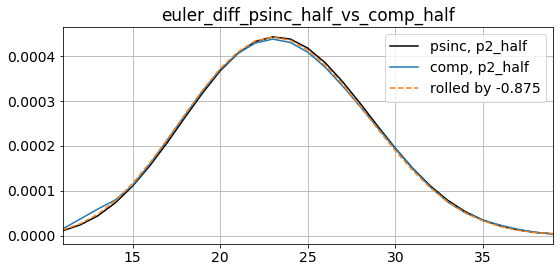

In [267]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)[10:40]#[145:155]#[25:35]#[20:30]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    
#     probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' or attribute == 'p2_half' else False

    sfx1 = 'psinc_noib'
#     sfx1 = 'comp_bal_noib'

    attribute1 = 'p2_nodes'
    attribute1 = 'p2_half'
    l1_attr = np.copy(attribute1)

    l1, p1 = get_ens(sfx1, diff, attribute1)
#     l2, p2 = get_ens(sfx2, diff, attribute)
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'psinc_noib'
    attribute3 = 'p2_nodes'
    attribute3 = 'p2_half'
    l3, p3 = get_ens(sfx3, diff, attribute3)


    pl = pt.plotter_1d(figsize=(8,4),fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]
    
    ref = 'Lake' if swe else 'psinc'
    full = 'SWE' if swe else 'comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    
    if 'nodes' in attribute1:
        l1_attr = 'p2_full'
    else:
        l1_attr = attribute1

    if 'nodes' in attribute3:
        l3_attr = 'p2_full'
    else:
        l3_attr = attribute3
    
    if 'comp' in l1:
        l1 = '%s, %s' %(full, l1_attr)
        l1c = full
    else:
        l1 = '%s, %s' %(ref, l1_attr)
        l1c = ref
        
    if 'comp' in l3:
        l3 = '%s, %s' %(full, l3_attr)
        l3c = full
    else:
        l3 = '%s, %s' %(ref, l3_attr)
        l3c = ref
        
    if l1c is not l3c:
        p1 -= p1.mean()
        p1 += p3.mean()
        
    ins = p1
    beta = 7.0/8
    shift = -1
    rolled = np.roll(ins,shift)
    rolled = (beta * ins + (1.0-beta) * rolled)
    beta = np.sign(shift) * beta
    rsfx = 'rolled by %.3f' %beta

    l1t = str(l1_attr)[3:]
    l3t = str(l3_attr)[3:]
#     
    l2 = '%s, imbal. IC w/ blending w/ time-shift' %full
#     l3 = '%s %s, %s' %(full, ic, attribute)
#     l3 = '%s %s' %(ref, attribute)
    
    ax.plot(times, p1, 'k', label=l1)
#     ax.plot(times, p2, label=l2)
    ax.plot(times, p3, label=l3)
    ax.plot(times, rolled, '--',label=rsfx)
# 
    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
        tcl = 'Euler vortex'
        qty = '$\delta \pi$'

    fn = 'euler_diff_%s_%s_vs_%s_%s' %(l1c, l1t, l3c, l3t)
#     fn = 'comp_half_vs_comp_full'
    ax.set_title("%s" %(fn))
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time')
#     ax.set_xticks(t_pos)
#     ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
#     fn = 'swe' if swe else 'euler'
#     pl.save_fig('%s' %fn)
    
    prt.prtt('plt')

# Rising bubble RMSE probe plot

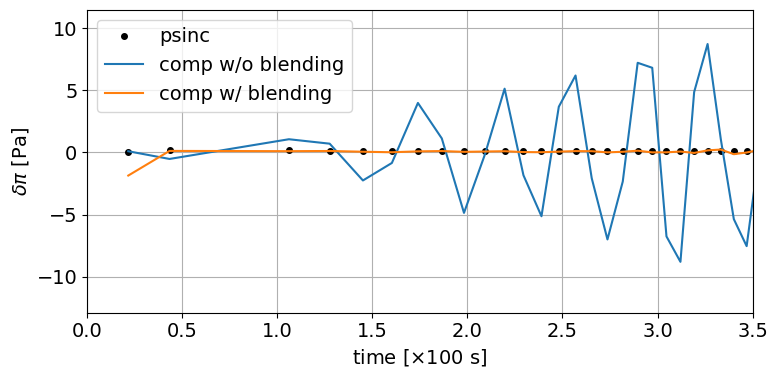

In [663]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"

py_directory = "../%s/" %directory

et = 10.0
Nx, Ny = 160, 80
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
u_ref = 100.0
R_gas = 287.4
T_ref = 300.0
Msq = u_ref * u_ref / (R_gas * T_ref)
# p_ref = 1.0
times = np.arange(0,527)#[1:]#[:186]
times = np.arange(0,164)#[:19]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
# t_axs = np.linspace(0.0,10,11)
# t_pos = np.linspace(0,times[-1],11)

# t_pos = np.linspace(0.0,times[-1],8)
# t_axs = np.linspace(0.0,3.50,len(t_pos))
probe_loc = [19,39]
l_typ = 'WINDOW_STEP'

rhoY = False
CFL = True
use_p4 = False

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=False)
    tt = tc.t_arr
    ens = ens[1:]
    tt = tt[1:]
    probe = ens[:,probe_loc[0],probe_loc[1]]
    probe *= p_ref
    probe = probe[1:] - probe[:-1]
    
    label = sfx + '_' + attribute
    return label, probe, tt

pls = []
ss = 'idt=2'

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' or attribute == 'p2_half' else False

    sfx1 = 'debug_rkadv_psinc_noib'
    if CFL : sfx1 = 'debug_rkadv_psinc_CFL_%s' %(ss)
    attribute1 = 'p2_nodes'
    if rhoY : attribute1 = 'rhoY'
#     l1_attr = np.copy(attribute1)
    l1, p1, tt = get_ens(sfx1, diff, attribute1)
    l1 = 'psinc'
    
    sfx2 = 'debug_rkadv_comp_noib'
    if CFL : sfx2 = 'debug_rkadv_comp_CFL_%s' %(ss)
    attribute2 = 'p2_nodes'
    if rhoY : attribute2 = 'rhoY'
    l2_attr = np.copy(attribute2)
    l2, p2, tt = get_ens(sfx2, diff, attribute2)
    l2 = 'comp w/o blending'
    
    sfx3 = 'debug_rkadv_comp_ib-0'
    if CFL : sfx3 = 'debug_rkadv_comp_CFL_%s_ib-0' %(ss)
#     if CFL : sfx3 = 'debug_rkadv_comp_CFL_ib-0_1'
    attribute3 = 'p2_nodes'
    if rhoY : attribute3 = 'rhoY'
    l3, p3, tt = get_ens(sfx3, diff, attribute3)
    l3 = 'comp w/ blending'
    
    if use_p4:
        sfx4 = 'debug_rkadv_comp_CFL_%s_3_ib-0' %(ss)
        l4, p4, _ = get_ens(sfx4, diff, attribute3)
        l4 = 'comp w/ blending (3-ts)'

    fs = (8,4) # used in the publication
    fs = (8,4) # used in poster
    pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)
#     print(tt)
#     if diff == True:
#         times = times[1:]
    tt = tt[:-1]
#         tt = tt
#         print(tt)
    
    ax.plot(tt, p1, 'ko', ms=4, label=l1)
    ax.plot(tt, p2, 'C0', label=l2)
    ax.plot(tt, p3, 'C1', ms=4, markevery=1, label=l3)
    if use_p4: ax.plot(tt, p4, 'C2', lw=2, ms=4, markevery=4, label=l4)
    
#     ax.plot(times, rolled, '--',label=rsfx)

#     fn = 'euler_diff_%s_%s_vs_%s_%s' %(l1c, l1t, l3c, l3t)
#     fn = 'comp_half_vs_comp_full'
    fn = 'rb_slides'
#     ax.set_title('') 
#     ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel(r'$\delta \pi$ [Pa]')
    ax.set_xlabel(r'time [$\times 100$ s]')
#     ax.set_xticks(t_pos)
#     ax.set_xticklabels(t_axs)
    ax.set_xlim([0.0,3.5])
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
#     fn = 'swe' if swe else 'euler'
    pl.save_fig('%s' %fn)
    
    prt.prtt('plt')

# Rising bubble contour plot

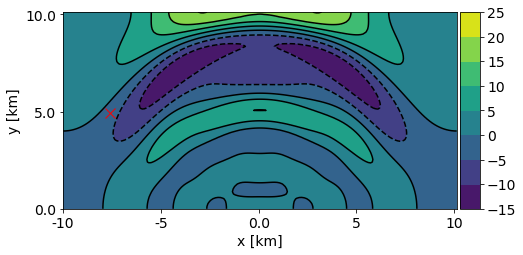

In [275]:
attribute = 'p2_nodes'
et = 10.0

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx, Ny = 160, 80
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = euler_tc.get_tag_dict()

p_ref = 8.61 * 10**4
# p_ref = 1.0

# times = np.arange(0,176)#[:50]
times = [14,15]
# times = [526]
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=False):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tags[9])[0]
    ens = ens.T * p_ref

    label = sfx + '_' + attribute
    return label, ens

diff = True
sfx1 = 'debug_rkadv_comp_noib'
attribute = 'rhoY'
l1, a1 = get_ens(euler_tc, sfx1, diff, attribute)
attribute = 'p2_nodes'
l2, a2 = get_ens(euler_tc, sfx1, diff, attribute)


# pl_lst = [[a1/a2 * 300.0, '']]
pl_lst = [[a2, '']]

pl = pt.plotter(pl_lst,ncols=2,figsize=(8,4),sharey=False)
x_axs = [-10,-5,0.0,5,10]
y_axs = [0.0,5.0,10.0]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,3)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('rb_deltap_contour')

# Probe view of the truth and observation for debugging

(299,)
(175,)


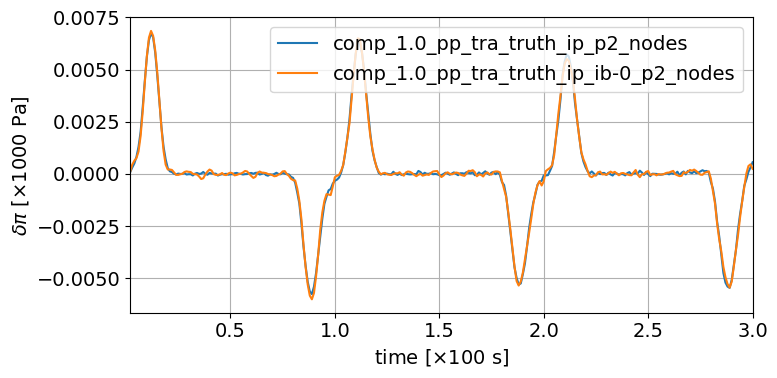

In [336]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 3.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

if swe:
    p_ref = 10.0
else:
    p_ref = 10.0
probe_loc = [32,32]

times = np.arange(0.0,3.01,0.01)[1:]
l_typ = 'TIME'
# times = np.arange(0.0,176)
# l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    probe = probe[1:]
    
#     probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    sfx1 = 'psinc_noib'
    sfx2c = 'comp_imbal_half_ib-0'
    sfx2b = 'comp_imbal_full_ib-16'
    
    sfx2c = 'psinc_1.0_pp_tra_truth_ip'
    sfx2c = 'comp_1.0_pp_tra_truth_ip_ib-0'
    sfx2b = 'comp_1.0_pp_tra_truth_ip'
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'comp_imbal_noib'

#     l1, p1 = get_ens(sfx1, diff, attribute)
#     l2a, p2a = get_ens(sfx2a, diff, attribute)
    l2b, p2b = get_ens(sfx2b, diff, attribute)
    l2c, p2c = get_ens(sfx2c, diff, attribute)
    attribute = 'p2_nodes'
#     l3, p3 = get_ens(sfx3, diff, attribute)

    fs = (8,4) # fs used in write-up for first pub
#     fs = (16,6)
    pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]

    ins = p1
    beta = 5.0/8
    rolled = np.roll(ins,-1)
    rolled = (beta * ins + (1.0-beta) * rolled)
    rsfx = 'rolled by %.3f' %beta
    
    ref = 'lake' if swe else 'psinc'
    full = 'SWE' if swe else 'comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    l1 = '%s, imbal. IC' %(ref)
#     l2c = '%s, imbal. IC w/ blending' %full
#     l2c = r'%s, imbal. IC, w/ blending ($\pi_{half}$)' %full
#     l2b = r'%s, imbal. IC, w/ blending ($\pi_{full}$)' %full
#     l = r'Comp imbal. IC, $\beta_{half}=4/8$'
    l3 = '%s, %s IC w/o blending' %(full, ic)
    ic = ic[:-1]
    
    print(times.shape)
    print(p1.shape)
#     ax.plot(times, p1, 'k', label=l1)
#     ax.plot(times, p2a, '-', ms=7, markevery=4, label=l2a)
    ax.plot(times, p2b, 'C0', ms=4, markevery=4, label=l2b)
    ax.plot(times, p2c, 'C1', ms=4, markevery=4, label=l2c)
#     ax.plot(times, p3, 'C2', label=l3)
#     ax.plot(times, rolled, '--',label=rsfx)

    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
#         tcl = 'Euler vortex'
        qty = '$\delta \pi$'

#     ax.set_title("%s: probe measurement of %s at [%i,%i]" %(tcl, qty, probe_loc[0]-32,probe_loc[1]-32))
    ax.set_xlim([times[0],times[-1]])
    if swe:
        ax.set_xlabel(r'time [$\times 1000$ s]')
        ax.set_ylabel(r'$\delta h$ [m]')
    else:
        ax.set_xlabel(r'time [$\times 100$ s]')
        ax.set_ylabel(r'$\delta \pi$ [$\times 1000$ Pa]')
        
#     ax.set_xticks(t_pos)
#     ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
#     ax.set_xlim([176*0.10,176*0.40])
#     ax.set_ylim([-0.0001,0.0005])
    pl.img.tight_layout()
    
    fn = 'swe' if swe else 'euler'
#     pl.save_fig('%s_w_%s' %(fn, ic))
#     pl.save_fig('euler_half_comparisons')
    
    prt.prtt('plt')

# Scale analysis for error jump

In [81]:
swe = False

if swe:
    Nx, Ny, Nz = 64, 1, 64
    et = 3.0
    # et = 0.5

    def load(Nx,Ny,Nz,et):
        base_fn = 'output_swe_vortex'
        pydir = '../%s/' %base_fn

        tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
        tags = tc.get_tag_dict()

        return tc, tags
    tc, tags = load(Nx,Ny,Nz,et)

else:
    Nx, Ny = 64, 64
    et = 3.0

    def load(Nx,Ny,et):
        base_fn = 'output_travelling_vortex'
        pydir = '../%s/' %base_fn

    #     tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
        tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
        tags = tc.get_tag_dict()
        return tc, tags
    tc, tags = load(Nx,Ny,et)

swe = False
p_ref / rho_ref = 86220.0
c^2 = 86220.00000000001
\bar{P}^u = -0.000284, \bar{P}^v = 0.000284
\bar{P}^u = 0.003430, \bar{P}^v = -0.009460
\bar{P}^u = 0.006448, \bar{P}^v = -0.018992


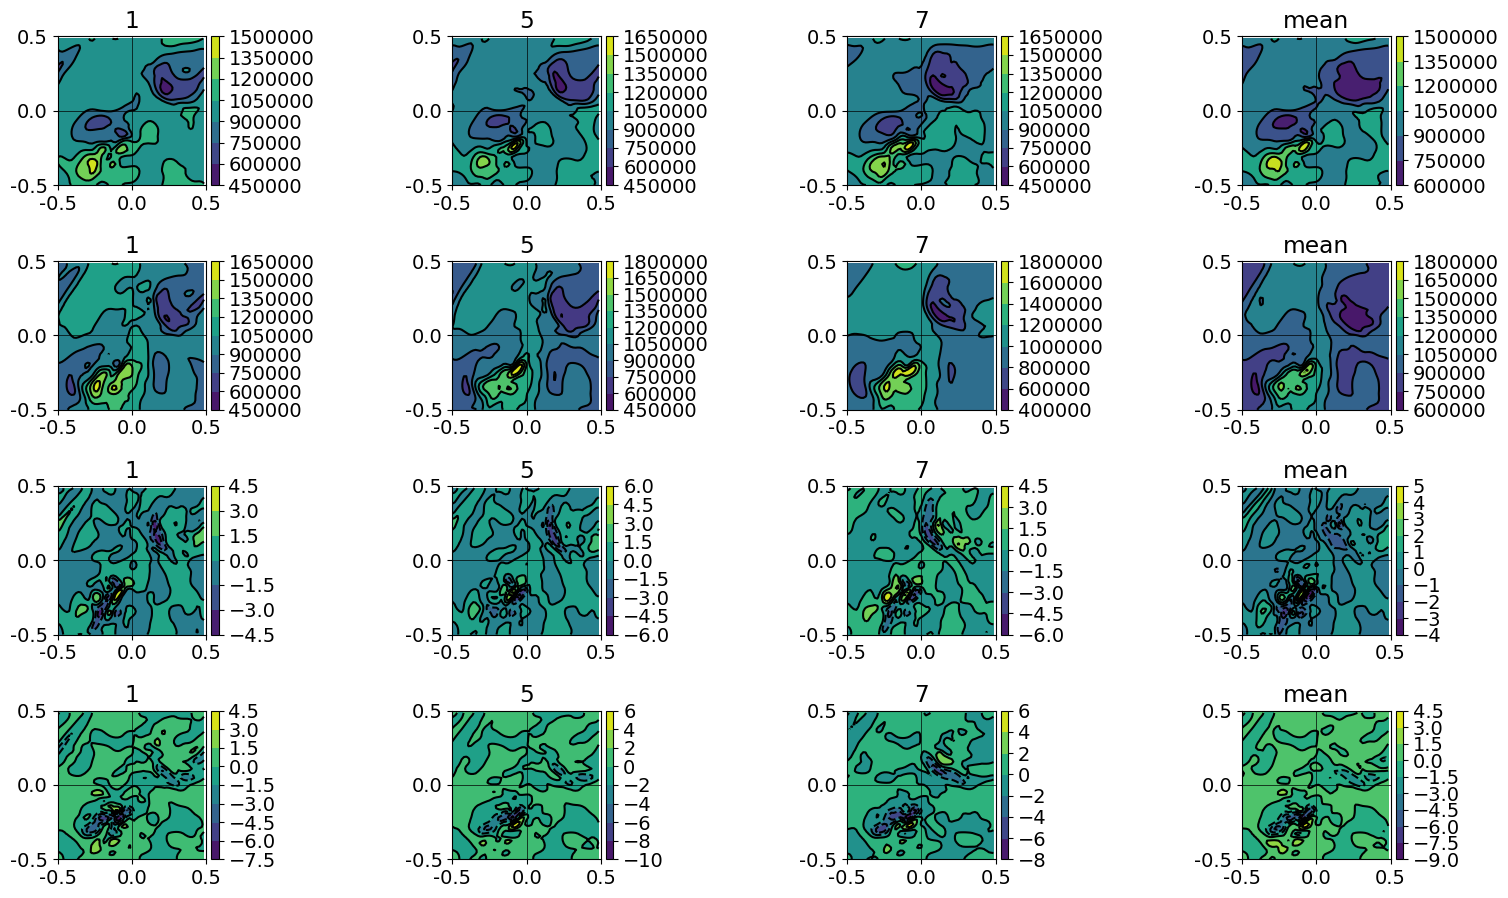

In [156]:
import random

random.seed(444)

N = 10
# sfx0 = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
# sfx0 = 'wdawloc_pp_all_tra_0.25_nonorm'
print("swe =", swe)
if swe:
    sfx0 = 'wdawloc_rhou_rhow_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhow_debug_letkf_s10p_ib-0'
else:
    sfx0 = 'wdawloc_rhou_rhov_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhov_debug_letkf_s10p_ib-0'
sfx1 = tc.cb_suffix(1,0, '%s' %(sfx0))
sfx_ref = 'noda_pp'
sfx_ref = 'pp_tra_ip_nonorm_ib-0'

if swe:
    attributes = ['rho','rhou','rhow']
else:
    attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
# attributes = ['p2_nodes']
# attribute = attributes[0]

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
file.close()

dx = np.diff(elem.x)[0]
dy = np.diff(elem.y)[0]

times = [0.0]
tag = 'ic'

times = [2.75]
tag = tags[9]

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

def get_ens_by_attr(times, N, attributes, sfx, tag=tag, inner=True):
    obj = oo()
    for attribute in attributes:
        ens = tc.get_ensemble(times, N, attribute, sfx, tag=tag, inner=True)[-1]
        if swe: ens = [mem[:,0,:] for mem in ens]
        ens = np.array([mem.T for mem in ens])
        
        mean = np.mean(ens,axis=0)
        ens = np.append(ens,mean[np.newaxis,...],axis=0)
        setattr(obj,attribute,ens)
    
    ens_u = getattr(obj,attributes[1]) / getattr(obj,'rho')
    ens_v = getattr(obj,attributes[2]) / getattr(obj,'rho')
    setattr(obj, 'u', ens_u)
    setattr(obj, 'v', ens_v)
    
    return obj

def grad(arr,dd,direction,ud):
    dd *= ud.h_ref
    arr *= ud.u_ref
    # get partial derivatives
    if direction == 'x':
        axs = 0
    elif direction == 'y':
        axs = 1
    else:
        assert(0, 'direction unspported')
        
    return np.gradient(arr,dd,axis=axs)

if len(attributes) > 1:
    ens0 = get_ens_by_attr(times,N,attributes,sfx0)
    ens1 = get_ens_by_attr(times,N,attributes,sfx1)
    ens_ref = get_ens_by_attr(times,N,attributes,sfx_ref)
else:
    ens0 = tc.get_ensemble(times, N, attributes[0], sfx0, tag=tag, inner=True)[-1]
    ens1 = tc.get_ensemble(times, N, attributes[0], sfx1, tag=tag, inner=True)[-1]
    ens_ref = tc.get_ensemble(times, N, attributes[0], sfx_ref, tag=tag, inner=True)[-1]

enses = [ens_ref, ens0, ens1]
sfxes = [sfx_ref, sfx0, sfx1]

attr_labels = pt.labels()

Ma = np.sqrt(ud.Msq)
c = ud.u_ref / Ma
print("p_ref / rho_ref =", ud.p_ref/ ud.rho_ref)
print("c^2 =", c**2)
# print(ud.Msq * 0.5)

arr_lst = []
idxs = 1,5,7,10
for bb,ens in enumerate(enses[:3]):
    us, vs = ens.u, ens.v
    
    gradu, gradv = np.zeros_like(us), np.zeros_like(us)
    for ii,uv in enumerate(zip(us,vs)):
        u, v = uv[0], uv[1]
        gradu[ii] = grad(u,dx,'x',ud) + grad(u,dy,'y',ud)
        gradv[ii] = grad(v,dy,'y',ud) + grad(v,dx,'x',ud)
        
#     print(graduv[:-1].mean())
    Ptu = gradu * ens.rho * c**2 * ud.rho_ref
    Ptu *= 0.01 * ud.t_ref
    Ptu /= ud.p_ref
    Ptv = gradv * ens.rho * c**2 * ud.rho_ref
    Ptv *= 0.01 * ud.t_ref
    Ptv /= ud.p_ref
    
    ### Convert to P
#     Pt_min = Pt.min()
#     Pt -= Pt_min
#     Pt = Pt**(1.0/1.4)
#     Pt += Pt_min
#     R_gas = 287.4
#     Pt = ud.p_ref / R_gas * Pt
    
    ### Convert to pi
#     Pt_min = Pt.min()
#     Pt -= Pt_min
#     Pt = Pt**(0.4/1.4)
#     Pt += Pt_min

    Ptu_arr, Ptv_arr = [], []
    u_arr, v_arr = [], []
    for idx in idxs:
        lbl = 'mean' if idx==10 else idx
        Ptu_arr.append([Ptu[idx],lbl])
        Ptv_arr.append([Ptv[idx],lbl])
        u_arr.append([us[idx] * ud.u_ref,lbl])
        v_arr.append([vs[idx] * ud.u_ref,lbl])
    arr_lst = u_arr + v_arr + Ptu_arr + Ptv_arr
    
    print(r'\bar{P}^u = %.6f, \bar{P}^v = %.6f' %(Ptu[:-1].mean(), Ptv[:-1].mean()))
        
narr_lst = np.array(arr_lst)

ncolslen = 4
fs = (16,10)
# fs = (5,5)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

x_axs = [-0.5,0.0,0.5]
y_axs = [-0.5,0.0,0.5]
if attribute == 'p2_nodes':
    nnx, nnz = Nx, Nz
else:
    nnx, nnz = Nx-1,Nx-1
    
x_loc = np.linspace(0,nnx,3)
y_loc = np.linspace(0,nnz,3)

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = 32, axvline = 32)

_ = pl.plot(aspect='equal',method='contour')
lbl = 'swe' if swe else 'euler'

In [159]:
import random

random.seed(444)

N = 10
# sfx0 = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
# sfx0 = 'wdawloc_pp_all_tra_0.25_nonorm'
print("swe =", swe)
if swe:
    sfx0 = 'wdawloc_rhou_rhow_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhow_debug_letkf_s10p_ib-0'
else:
    sfx0 = 'wdawloc_rhou_rhov_pp_tra_ip_nonorm_ib-0'
    sfx0 = 'wdawloc_rhou_rhov_debug_letkf_s10p_ib-0'
sfx1 = tc.cb_suffix(1,0, '%s' %(sfx0))
sfx_ref = 'noda_pp'
sfx_ref = 'pp_tra_ip_nonorm_ib-0'

if swe:
    attributes = ['rho','rhou','rhow']
else:
    attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
# attributes = ['p2_nodes']
# attribute = attributes[0]

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
file.close()

dx = np.diff(elem.x)[0]
dy = np.diff(elem.y)[0]

times = [0.0]
tag = 'ic'

times = np.arange(0.0,3.01,0.01)[1:]
tag = tags[9]

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

def get_ens_by_attr(times, N, attributes, sfx, tag=tag, inner=True):
    obj = oo()
    for attribute in attributes:
        ens = tc.get_ensemble(times, N, attribute, sfx, tag=tag, inner=True)#[-1]
        
#         if swe: ens = [mem[:,0,:] for mem in ens]
        ens_cp = np.zeros_like(ens)
        for mm, mem in enumerate(ens):
            for at, at_t in enumerate(mem):
                at_t = at_t.T
                ens_cp[mm,at] = at_t
#         ens = np.array([mem.T for mem in ens])
        ens = np.copy(ens_cp)
#         print(ens.shape)
        
        mean = np.mean(ens,axis=1)
        ens = np.append(ens,mean[:,np.newaxis,...],axis=1)
        setattr(obj,attribute,ens)
    
    ens_u = getattr(obj,attributes[1]) / getattr(obj,'rho')
    ens_v = getattr(obj,attributes[2]) / getattr(obj,'rho')
    setattr(obj, 'u', ens_u)
    setattr(obj, 'v', ens_v)
    
    return obj

def grad(arr,dd,direction,ud):
    dd *= ud.h_ref
    arr *= ud.u_ref
    # get partial derivatives
    if direction == 'x':
        axs = 0
    elif direction == 'y':
        axs = 1
    else:
        assert(0, 'direction unspported')
        
    return np.gradient(arr,dd,axis=axs)

if len(attributes) > 1:
    ens0 = get_ens_by_attr(times,N,attributes,sfx0)
    ens1 = get_ens_by_attr(times,N,attributes,sfx1)
    ens_ref = get_ens_by_attr(times,N,attributes,sfx_ref)

enses = [ens_ref, ens0, ens1]
sfxes = [sfx_ref, sfx0, sfx1]

attr_labels = pt.labels()

Ma = np.sqrt(ud.Msq)
c = ud.u_ref / Ma
print("p_ref / rho_ref =", ud.p_ref/ ud.rho_ref)
print("c^2 =", c**2)

arr_lst = []
barPu, barPv, barPuv = [], [], []
idxs = 1,5,7,10
for bb,ens in enumerate([enses[0]]):

    for tt,time in enumerate(times):
        us, vs = ens.u[tt], ens.v[tt]
        rho = ens.rho[tt]
#         print(us.shape)

        gradu, gradv = np.zeros_like(us), np.zeros_like(us)
        for ii,uv in enumerate(zip(us,vs)):
            u, v = uv[0], uv[1]
            gradu[ii] = grad(u,dx,'x',ud) + grad(u,dy,'y',ud)
            gradv[ii] = grad(v,dy,'y',ud) + grad(v,dx,'x',ud)

        Ptu = gradu * rho * c**2 * ud.rho_ref
        Ptu *= 0.01 * ud.t_ref
        Ptu /= ud.p_ref
#         Ptu *= ud.rho_ref / ud.p_ref

#         Ptu_min = Ptu.min()
#         Ptu -= Ptu_min
#         Ptu = Ptu**(1.0/1.4)
#         Ptu += Ptu_min
#         R_gas = 287.4
#         Ptu = ud.p_ref / R_gas * Ptu
        
        Ptv = gradv * rho * c**2 * ud.rho_ref
        Ptv *= 0.01 * ud.t_ref
        Ptv /= ud.p_ref
        Ptuv = (gradu + gradv) * rho * c**2 * ud.rho_ref
        Ptuv *= 0.01 * ud.t_ref
        Ptuv /= ud.p_ref

        Ptu_arr, Ptv_arr, Ptuv_arr = [], [], []
        u_arr, v_arr = [], []
        for idx in idxs:
            lbl = 'mean' if idx==10 else idx
            Ptu_arr.append([Ptu[idx],lbl])
            Ptv_arr.append([Ptv[idx],lbl])
            Ptuv_arr.append([Ptuv[idx],lbl])
            u_arr.append([us[idx] * ud.u_ref,lbl])
            v_arr.append([vs[idx] * ud.u_ref,lbl])
        arr_lst = u_arr + v_arr + Ptu_arr + Ptv_arr + Ptuv_arr

    #     print(r'\bar{P}^u = %.6f, \bar{P}^v = %.6f' %(Ptu[:-1].mean(), Ptv[:-1].mean()))
        if bb == 0:
            barPu.append(Ptu[:-1].mean())
            barPv.append(Ptv[:-1].mean())
            barPuv.append(Ptuv[:-1].mean())
        

swe = False
p_ref / rho_ref = 86220.0
c^2 = 86220.00000000001


In [176]:
print(ud.Msq)

0.1159823706796567


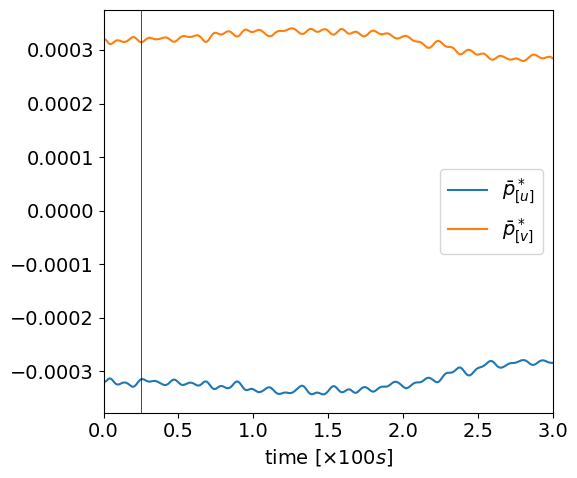

In [160]:
t_axs = times

plt.figure(figsize=(6,5))
plt.plot(t_axs, barPu, label=r'$\bar{p}_{[u]}^*$')
plt.plot(t_axs,barPv, label=r'$\bar{p}_{[v]}^*$')
plt.axvline(0.25, c='k', lw=0.5)
plt.xlim([0.0,3.0])
plt.xlabel(r'time $[\times 100s]$')
plt.legend()
# plt.plot(barPuv)
plt.tight_layout()
plt.savefig('ens_wo_da.pdf',bbox_inches='tight')
plt.show()

# RMSE observation sparsity RMSEs

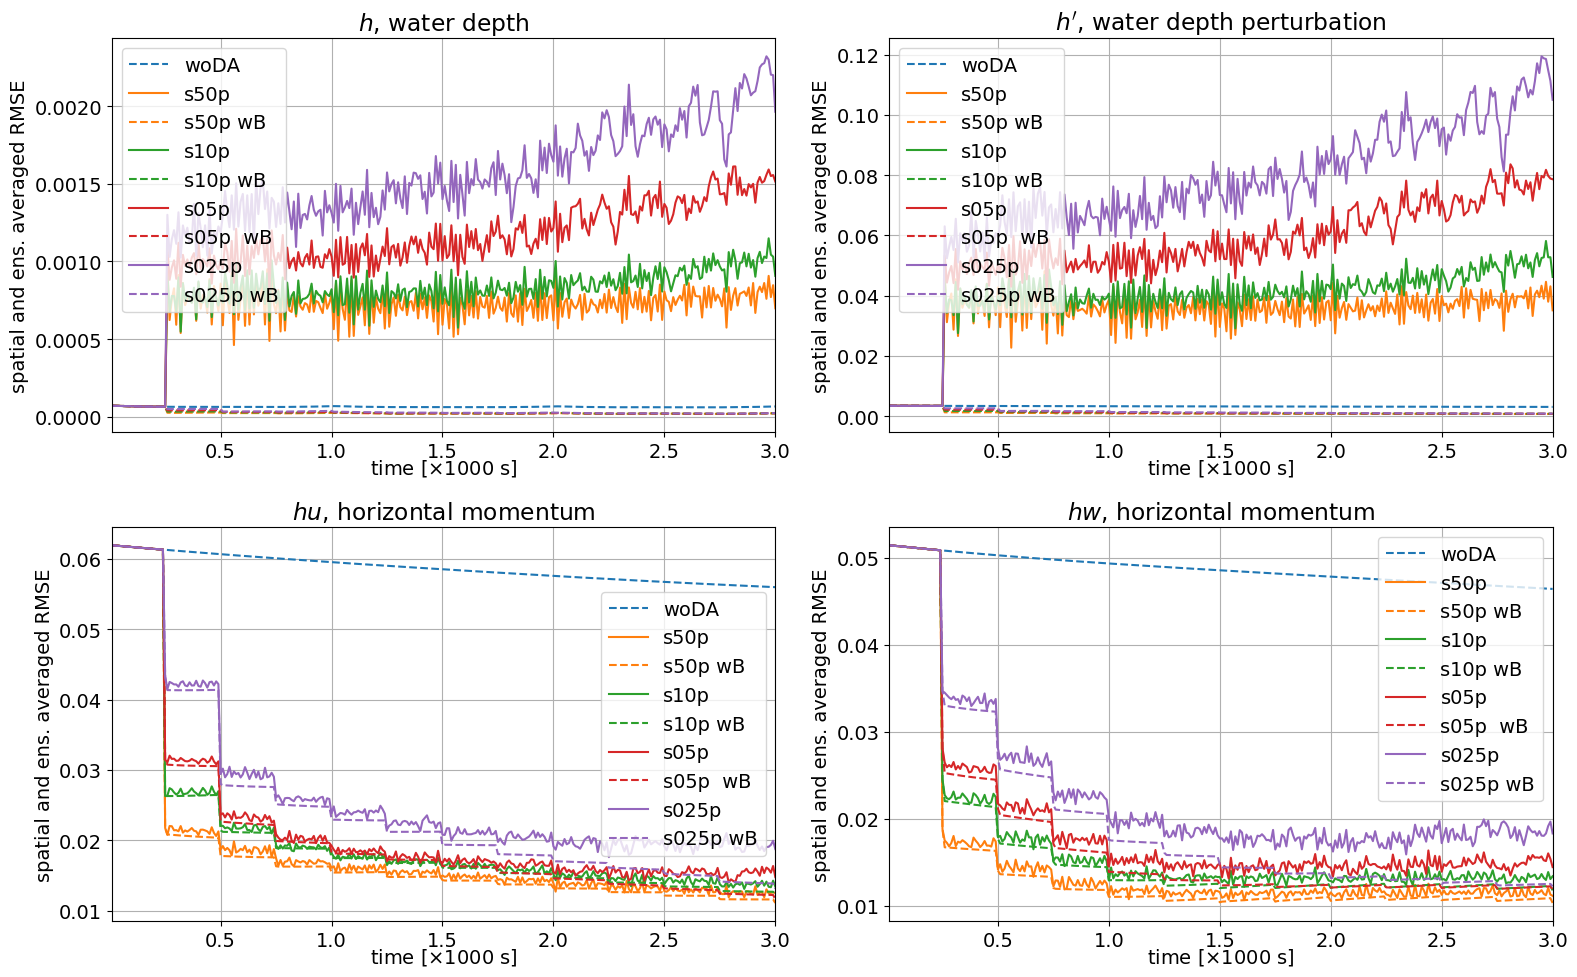

In [175]:
import matplotlib.pyplot as plt

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

et = 3.0
Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

# base_fn = "output_travelling_vortex"
# directory = "output_travelling_vortex"
# py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

py_directory = "../%s/" %directory

plt.style.use('default')


N = 10
times = np.arange(0.0,3.01,0.01)[1:]

probe_idx = [32,32]

fn = 'effects_obs_covar_ensemble_spread'
title = ''

pl = pt.plotter_1d(figsize=(16,10),fontsize=14,ncols=2,nrows=2)
swe = True if 'swe' in base_fn else False
tc = swe_tc if swe else euler_tc
        
prt = utils.prt_time(debug=False)
if swe:
    attr_labels = pt.swe_labels()
    attributes = ['rho','p2_nodes','rhou','rhow']
#     attributes = ['rho','rhou']
else:
    attr_labels = pt.labels()
    attributes = ['rho','p2_nodes','rhou','rhov']
#     attributes = ['rhoY','p2_nodes']

# attr_shorts = pt.short_labels()

rmse_type = 'spatial'

ens_34 = True
ens_58 = True

def get_ens(sfx,diff):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)[1:]
    if swe:
        ens = ens[:,:,0,:]
    return ens

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    gt = 'n' if attribute == 'p2_nodes' else 'c'
    
    ens_noda_suffix = 'noda_pp'
    ens_noda_suffix = 'pp_tra_ip_nonorm_ib-0'
#     ens_noda_label = 'EnNoDA'
    ens_noda_label = 'woDA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    obs_attrs = 'rhou_rhow' if swe else 'all'
    tags = 's50p'
    ens_1_suffix = 'wdawloc_%s_debug_letkf_%s_ib-0' %(obs_attrs,tags)
    ens_1_label = r's50p'
    
    ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
    ens_2_label = r's50p wB'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    
    if ens_34:        
#         obs_attrs = 'rhou_rhow' if swe else 'all'
        tags = 's10p'
        ens_3_suffix = 'wdawloc_%s_debug_letkf_%s_ib-0' %(obs_attrs,tags)
        ens_4_suffix = tc.cb_suffix(1,0, '%s' %(ens_3_suffix))
        
        ens_3 = get_ens(ens_3_suffix, diff)
        ens_4 = get_ens(ens_4_suffix, diff)
        
        ens_3_label = r's10p'
        ens_4_label = r's10p wB'
        
    if ens_58:
        tags = 's05p'
        ens_5_suffix = 'wdawloc_%s_debug_letkf_%s_ib-0' %(obs_attrs,tags)
        ens_6_suffix = tc.cb_suffix(1,0, '%s' %(ens_5_suffix))
        ens_5 = get_ens(ens_5_suffix, diff)
        ens_6 = get_ens(ens_6_suffix, diff)
        ens_5_label = r's05p'
        ens_6_label = r's05p  wB'
        
        tags = 's025p'
        ens_7_suffix = 'wdawloc_%s_debug_letkf_%s_ib-0' %(obs_attrs,tags)
        ens_8_suffix = tc.cb_suffix(1,0, '%s' %(ens_7_suffix))
        ens_7 = get_ens(ens_7_suffix, diff)
        ens_8 = get_ens(ens_8_suffix, diff)
        ens_7_label = r's025p'
        ens_8_label = r's025p wB'

    obs = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ip', label_type='TIME',avg=True, diff=diff)
    truth = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ip_ib-0', label_type='TIME',avg=True, diff=diff)
    if swe:
        truth = truth[:,:,0,:]

    ax = pl.get_ax(i)
    avg = False

    if rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg,grid_type=gt)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg,grid_type=gt)
        if ens_34:
            diff_ens_3 = tc.spatially_averaged_rmse(ens_3,truth,avg=avg,grid_type=gt)
            diff_ens_4 = tc.spatially_averaged_rmse(ens_4,truth,avg=avg,grid_type=gt)
        if ens_58:
            diff_ens_5 = tc.spatially_averaged_rmse(ens_5,truth,avg=avg,grid_type=gt)
            diff_ens_6 = tc.spatially_averaged_rmse(ens_6,truth,avg=avg,grid_type=gt)
            diff_ens_7 = tc.spatially_averaged_rmse(ens_7,truth,avg=avg,grid_type=gt)
            diff_ens_8 = tc.spatially_averaged_rmse(ens_8,truth,avg=avg,grid_type=gt)
        ax.set_ylabel('spatial and ens. averaged RMSE')
        if swe:
            ax.set_xlabel(r'time [$\times 1000$ s]', ha='center', va='center', labelpad=5)
        else:
            ax.set_xlabel(r'time [$\times 100$ s]', ha='center', va='center')

    if diff == True: times = times[1:]
    
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
    ax.plot(times,diff_ens_1, 'C1', label=ens_1_label)
    ax.plot(times,diff_ens_2, 'C1--', label=ens_2_label)
    if ens_34:
        ax.plot(times,diff_ens_3, 'C2', label=ens_3_label)
        ax.plot(times,diff_ens_4, 'C2--', label=ens_4_label)
    if ens_58:
        ax.plot(times,diff_ens_5, 'C3', label=ens_5_label)
        ax.plot(times,diff_ens_6, 'C3--', label=ens_6_label)
        ax.plot(times,diff_ens_7, 'C4', label=ens_7_label)
        ax.plot(times,diff_ens_8, 'C4--', label=ens_8_label)


    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.grid()
    ax.legend()
    plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
    
    prt.prtt('plt')

plt.tight_layout()
lbl = 'swe' if swe else 'euler'
plt.savefig('%s_rmse_obs_sparsity.pdf' %lbl, bbox_inches="tight")
plt.show()